In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
df = pd.read_csv("student_engagement_data_10000.csv") 

print(df.head(10))



   Student ID  Session ID       Date  \
0           1         183  1/20/2025   
1           2         121  1/20/2025   
2           3         169  1/10/2025   
3           4         132  1/20/2025   
4           5         190  1/18/2025   
5           6         109   1/1/2025   
6           7         188  1/11/2025   
7           8         160  1/18/2025   
8           9         184   1/8/2025   
9          10         111   1/2/2025   

                             EEG Data (PSD Features) Engagement Level  \
0  [0.02336871035675725, 0.14892576656473, 0.4845...             High   
1  [0.3587673311624021, 0.8537981137219391, 0.420...              Low   
2  [0.7420744093003028, 0.9072353407615483, 0.122...         Moderate   
3  [0.5596059164442914, 0.4645215049524961, 0.062...             High   
4  [0.15041646487754368, 0.7331633184349893, 0.86...             High   
5  [0.48602374487398736, 0.29692456412338686, 0.4...              Low   
6  [0.613720914913789, 0.7347672728316721, 0.717

In [7]:
# Overview of the dataset
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB
None
Index(['Student ID', 'Session ID', 'Date', 'EEG Data (PSD Features)',
       'Engagement Level', 'Attention Level', 'Internet Connectivity',
       'Adaptivity Level', 'Learning Mode Pred

In [9]:
# Summary statistics
print(df.describe())

        Student ID    Session ID  Performance Metrics
count  10000.00000  10000.000000         10000.000000
mean    5000.50000    149.762700            74.674300
std     2886.89568     28.783232            14.383404
min        1.00000    100.000000            50.000000
25%     2500.75000    125.000000            62.000000
50%     5000.50000    150.000000            75.000000
75%     7500.25000    174.000000            87.000000
max    10000.00000    199.000000            99.000000


In [10]:
# Count missing values
print(df.isnull().sum()) 


Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64


In [22]:
value_counts = df[['Student ID','Learning Mode Prediction']].value_counts()
value_counts


Student ID  Learning Mode Prediction
1           Visual Learner              1
6671        Auditory Learner            1
6664        Visual Learner              1
6665        Auditory Learner            1
6666        Kinesthetic Learner         1
                                       ..
3334        Visual Learner              1
3335        Kinesthetic Learner         1
3336        Auditory Learner            1
3337        Auditory Learner            1
10000       Visual Learner              1
Name: count, Length: 10000, dtype: int64

In [41]:
# Mapping levels to numeric scores
level_map = {'Low': 1, 'Moderate': 2, 'High': 3}
def level_label(value):
    if value < 1.98:
        return 'Low'
    elif value < 2.01:
        return 'Moderate'
    else:
        return 'High'


df['Attention Numeric'] = df['Attention Level'].map(level_map)
df['Engagement Numeric'] = df['Engagement Level'].map(level_map)
daily_avg = df.groupby('Date')[['Attention Numeric','Engagement Numeric']].mean()

daily_avg['Attention Level Label'] = daily_avg['Attention Numeric'].apply(level_label)
daily_avg['Engagement Level Label'] = daily_avg['Engagement Numeric'].apply(level_label)
daily_avg

,Attention Numeric,Engagement Numeric,Attention Level Label,Engagement Level Label
Date,,,,
1/1/2025,2.013158,2.046053,High,High
1/10/2025,2.047619,1.977778,High,Low
1/11/2025,1.922388,1.958209,Low,Low
1/12/2025,2.050794,2.015873,High,High
1/13/2025,1.940810,1.947040,Low,Low
1/14/2025,1.939948,1.966057,Low,Low
1/15/2025,1.963277,1.920904,Low,Low
1/16/2025,2.000000,2.075988,Moderate,High
1/17/2025,2.000000,1.976898,Moderate,Low


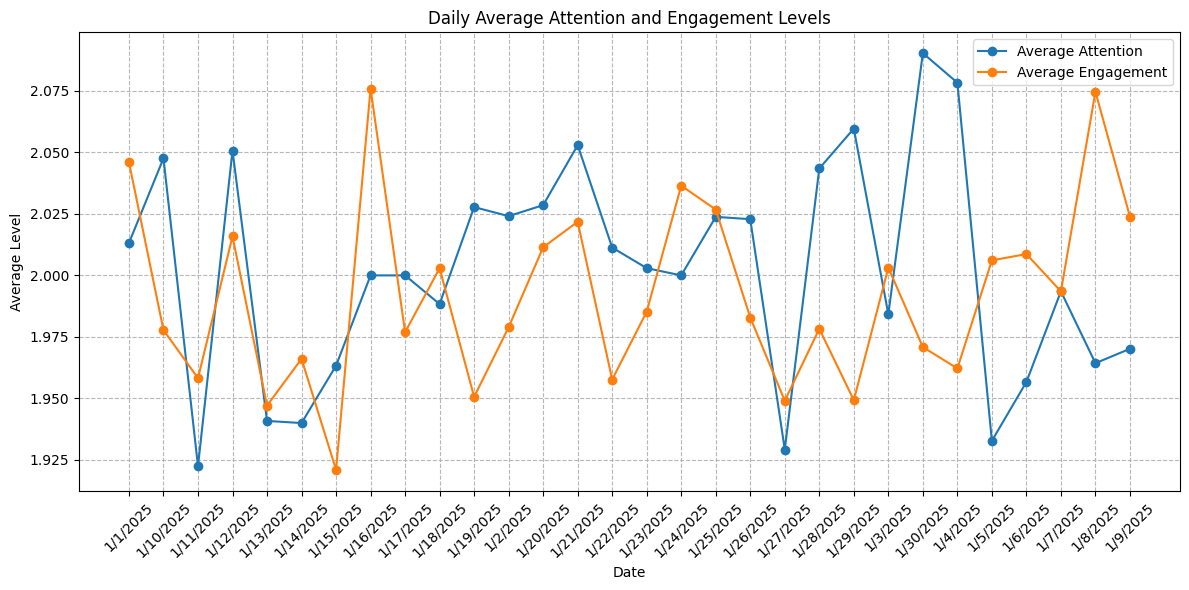

In [67]:
plt.figure(figsize=(12,6))
plt.plot(daily_avg.index,daily_avg['Attention Numeric'],marker='o',label ='Average Attention')
plt.plot(daily_avg.index,daily_avg['Engagement Numeric'],marker='o',label ='Average Engagement')

plt.title('Daily Average Attention and Engagement Levels')
plt.xlabel('Date')
plt.ylabel('Average Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha =0.9, linestyle ='--')
plt.tight_layout()
plt.show()


In [71]:
std_eng = df.groupby('Student ID')[['Attention Numeric','Engagement Numeric']].mean()
std_eng

,Attention Numeric,Engagement Numeric
Student ID,,
1,3.0,3.0
2,3.0,1.0
3,3.0,2.0
4,2.0,3.0
5,3.0,3.0
...,...,...
9996,3.0,3.0
9997,3.0,3.0
9998,1.0,1.0


In [78]:
# Top 10 most engaged students
top_10_engaged = std_eng.sort_values("Engagement Numeric", ascending=False).head(10)
print("Top 10 Engaged Students:")
print(top_10_engaged)

# Bottom 10 least engaged students
bottom_10_engaged = std_eng.sort_values("Engagement Numeric", ascending=True).head(10)
print("\nBottom 10 Engaged Students:")
print(bottom_10_engaged)

# Top 10 most attentive students
top_10_attentive = std_eng.sort_values("Attention Numeric", ascending=False).head(10)
print("\nTop 10 Attentive Students:")
print(top_10_attentive)

# Bottom 10 least attentive students
bottom_10_attentive = std_eng.sort_values("Attention Numeric", ascending=True).head(10)
print("\nBottom 10 Attentive Students:")
print(bottom_10_attentive)

Top 10 Engaged Students:
            Attention Numeric  Engagement Numeric
Student ID                                       
1                         3.0                 3.0
7036                      3.0                 3.0
7030                      3.0                 3.0
2933                      1.0                 3.0
7027                      1.0                 3.0
2936                      2.0                 3.0
2938                      3.0                 3.0
2939                      1.0                 3.0
2940                      1.0                 3.0
7023                      2.0                 3.0

Bottom 10 Engaged Students:
            Attention Numeric  Engagement Numeric
Student ID                                       
2519                      1.0                 1.0
2990                      3.0                 1.0
7055                      1.0                 1.0
2993                      1.0                 1.0
2994                      1.0                 

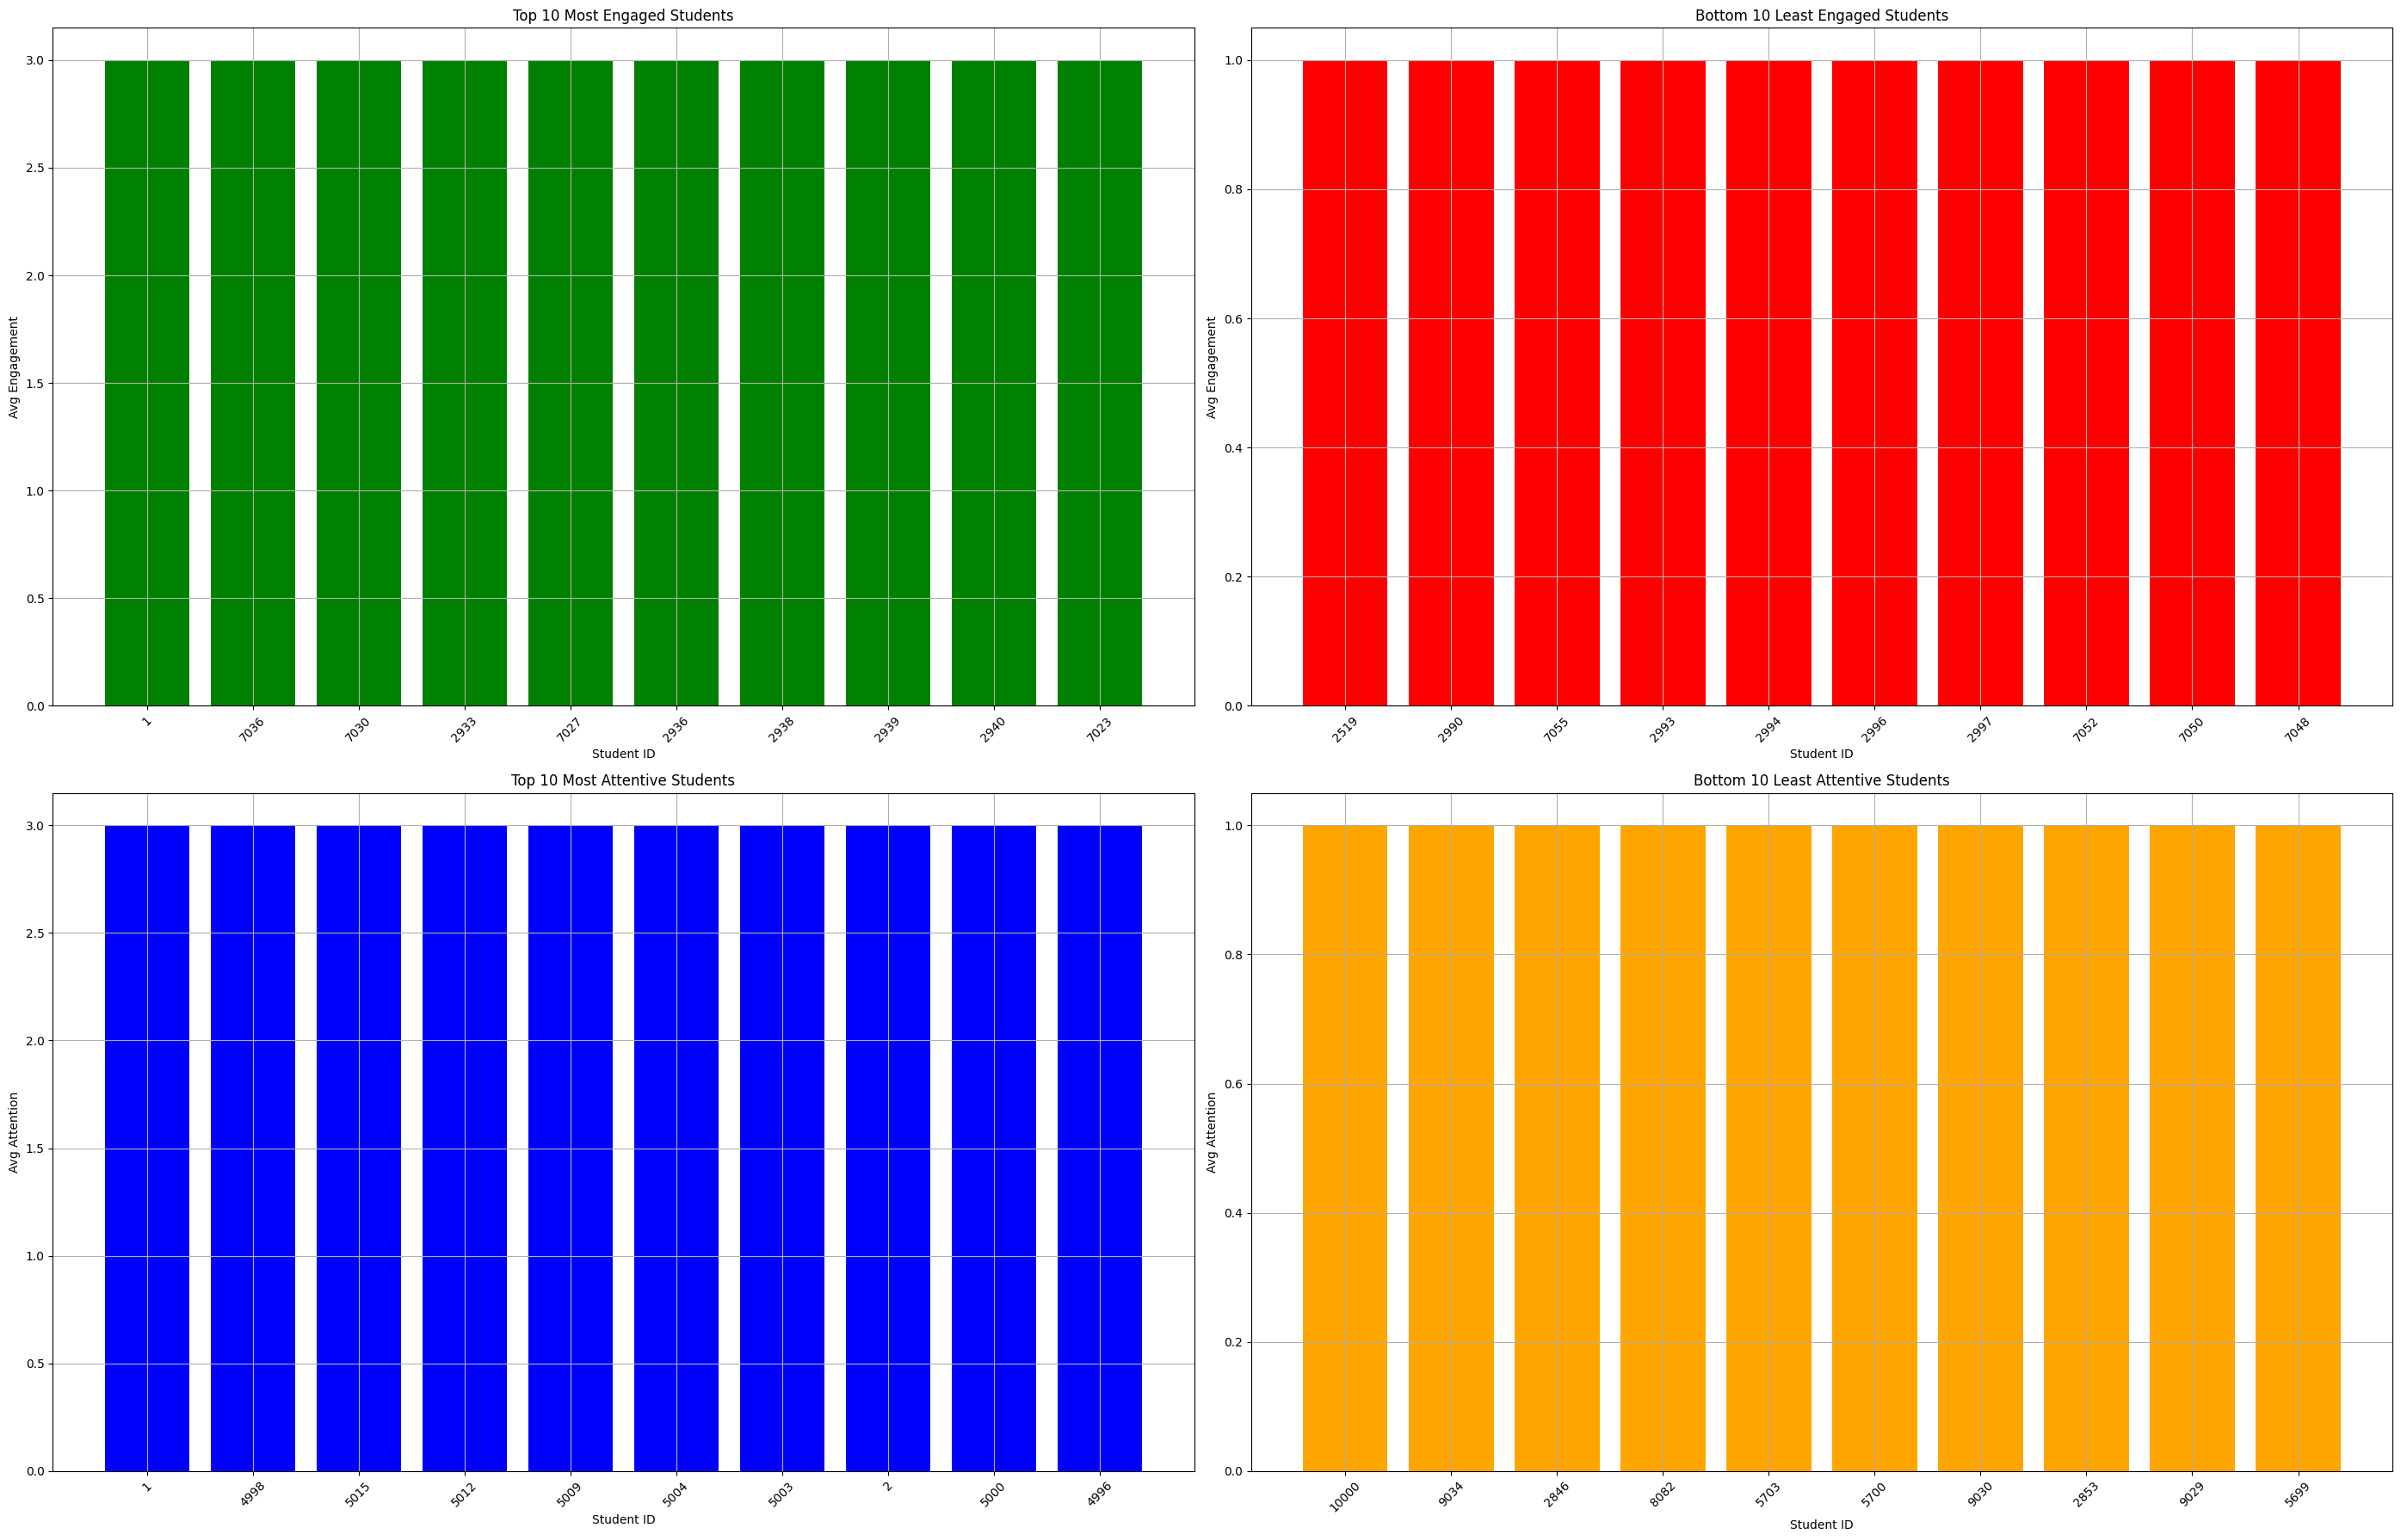

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(28, 18))

# Top 10 Engaged Students
axs[0, 0].bar(top_10_engaged.index.astype(str), top_10_engaged['Engagement Numeric'], color='green')
axs[0, 0].set_title('Top 10 Most Engaged Students')
axs[0, 0].set_xlabel('Student ID')
axs[0, 0].set_ylabel('Avg Engagement')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Bottom 10 Engaged Students
axs[0, 1].bar(bottom_10_engaged.index.astype(str), bottom_10_engaged['Engagement Numeric'], color='red')
axs[0, 1].set_title('Bottom 10 Least Engaged Students')
axs[0, 1].set_xlabel('Student ID')
axs[0, 1].set_ylabel('Avg Engagement')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Top 10 Attentive Students
axs[1, 0].bar(top_10_attentive.index.astype(str), top_10_attentive['Attention Numeric'], color='blue')
axs[1, 0].set_title('Top 10 Most Attentive Students')
axs[1, 0].set_xlabel('Student ID')
axs[1, 0].set_ylabel('Avg Attention')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Bottom 10 Attentive Students
axs[1, 1].bar(bottom_10_attentive.index.astype(str), bottom_10_attentive['Attention Numeric'], color='orange')
axs[1, 1].set_title('Bottom 10 Least Attentive Students')
axs[1, 1].set_xlabel('Student ID')
axs[1, 1].set_ylabel('Avg Attention')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


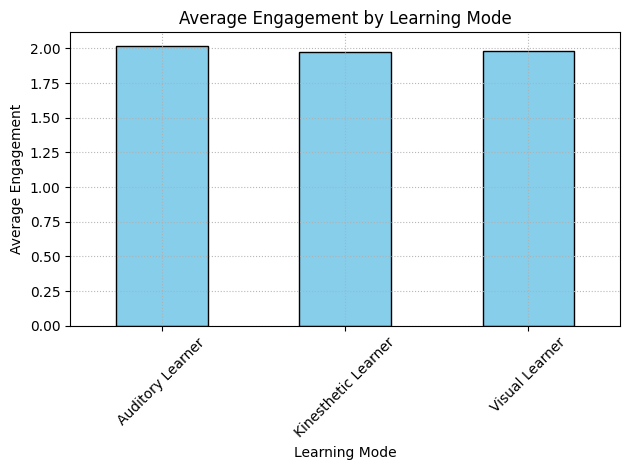

In [92]:
mode_eng = df.groupby('Learning Mode Prediction')['Engagement Numeric'].mean()
mode_eng
mode_eng.plot(kind = 'bar',color = 'skyblue', edgecolor="black")
plt.title('Average Engagement by Learning Mode')
plt.xlabel('Learning Mode')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.grid(True, linestyle = "dotted" ,alpha =0.9)
plt.tight_layout()
plt.show()

Daily engagement and attention fluctuate but show consistent patterns on specific dates, indicating study habits.

🧑‍🎓 Some students maintain consistently high engagement, while others remain low, showing different learning behaviors.

🎓 Learning mode impacts engagement – certain modes (like interactive/IoT-based learning) show higher engagement levels.

🔎 Top 10 students are significantly more engaged compared to the bottom 10, highlighting performance gaps.

📊 Attention and engagement are positively correlated – when attention is higher, engagement also tends to rise.

🛠 Dataset shows variation in participation, useful for improving personalized learning strategies.
